### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

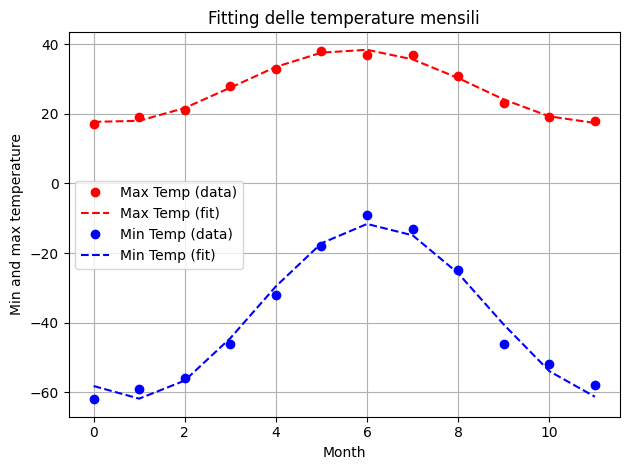

MAE max: 0.77 | RMSE max: 0.85
MAE min: 2.34 | RMSE min: 2.70


In [5]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)

from scipy.optimize import curve_fit

# Funzione sinusoidale
def sinusoide(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# MAE e RMSE (senza sklearn)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Fitting delle curve
params_max, _ = curve_fit(sinusoide, months, temp_max, p0=[10, 2*np.pi/12, 0, 25])
params_min, _ = curve_fit(sinusoide, months, temp_min, p0=[10, 2*np.pi/12, 0, -30])

# Valori fittati
fit_max = sinusoide(months, *params_max)
fit_min = sinusoide(months, *params_min)

# Plot
plt.plot(months, temp_max, "ro", label="Max Temp (data)")
plt.plot(months, fit_max, "r--", label="Max Temp (fit)")
plt.plot(months, temp_min, "bo", label="Min Temp (data)")
plt.plot(months, fit_min, "b--", label="Min Temp (fit)")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.title("Fitting delle temperature mensili")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Errori
mae_max = mae(temp_max, fit_max)
rmse_max = rmse(temp_max, fit_max)
mae_min = mae(temp_min, fit_min)
rmse_min = rmse(temp_min, fit_min)

# Stampa
print(f"MAE max: {mae_max:.2f} | RMSE max: {rmse_max:.2f}")
print(f"MAE min: {mae_min:.2f} | RMSE min: {rmse_min:.2f}")